# Ordenamiento de *Clientes Potenciales*.

Se ha consolidado la Información desde el 2019 al 2022, de las vistas realizadas por las consultoras.

**El proyecto pretende ordenar los clientes en orden de mayor probabilidad de Compra.**

![Logo Nutriendo](imagenes/logo_nutriendo.png)

## Código

### [https://github.com/cajivar/BootCamp_Proyecto2023_CF](https://github.com/cajivar/BootCamp_Proyecto2023_CF)

## Dataset

Este dataset es propiedad de Laboratorios Nutriendo SAS [Clientes Visitados Data Set]



## Solución  

La empresa tiene información de clientes anteriores que en algún momento han sido contactados en el pasado comprar la inversión en el pasado sin importar si lo compraron o no. Esta información está contenida en el archivo `train.csv`.

Así mismo, para ayudarte hay un archivo llamado `test.csv` con datos de otros clientes pero que deberás usar para probar tus resultados.

**Como no tenemos más información más allá de si un cliente compró o no compró, vamos a utilizar las probabilidades que nos de un modelo de clasificación para decidir quién tiene más probabilidades de convertir**.

Este problema se conoce como *lead scoring*.

### Descripción de los datos

| Variable     | Definición                                                              |
|--------------|-------------------------------------------------------------------------|
| *ID*         | Identificador tabla                                         |
| *Empresa*        | Edad del cliente                                                        |
| *Nombre*        | Nombre del cliente                                        |
| *Sexo*    | Sexo del cliente                                              |
| *Fec_Nac*  | Fecha Nacimiento del cliente                                          |
| *Identificación*    | Numero documento identidad                      |
| *telefono*    | Telefono contacto del cliente                                        |
| *Company*    | Empresa de trabajo de la visita al cliente                    |
| *Job*       | Ocupación del cliente                         |
| *Email*    | correo electrónico del cliente                |
| *Addres*      | Dirección residencia del cliente                                 |
| *Comentario*        | Observaciones de Salud del Cliente                                 |
| *Height*   | Altura del cliente                                    |
| *Weight*   | Peso del cliente |
| *IMC*      | Indice de Masa Muscular Calculado            |
| *Estado*   | Clasificación según el IMC del cliente   |
| *Result*   | Observaciones de la prueba del scanner |
| *Fecha* | Feha de la Prueba    |
| *Edad* | Edad del cliente    |
| *Compra* | Si el cliente compro como resultado de la campaña    |
| *Año* | Año de la visita    |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('./data/Data_Nut_2019-2022.csv')

In [3]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [4]:
df.dtypes

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [5]:
print(df.shape)
print(type(df.shape))

(47327, 22)
<class 'tuple'>


In [6]:
df['Compra'].unique()

array(['SI', 'NO'], dtype=object)

In [7]:
df['telefono'] = df['telefono'].astype('object')
df['Company'] = df['Company'].astype('object')

In [8]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Compra'])

In [11]:
print(df_train.shape)
print(type(df_train.shape))
df_train.head()

(33128, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
32378,32379,TRANSPIEDECUESTA OPERATIVO,EDWIN ERNESTO CAMACHO,Masculino,29/10/1983,13930315,3112162031,T/A 119/65MMHG FC 78,35,edwinfigueredo2910@gmail.com,...,170,109,37.7,Obesidad_2,Grasa parcial severa,5,3/09/2021,37,NO,2021
21863,21864,PACU ADMINISTRATIVO LOS ACACIOS-PAMPLONA,YORLADI VIDARTE CALVACHE,Femenino,22/02/1989,1114880421,3205062003,COORDINADORA ADMINISTRATIVA,365,yovica2202@gmail.com,...,170,74,25.6,Sobrepeso,Grasa parcial severa,5,4/08/2020,31,NO,2020
26362,26363,TRANSPIEDECUESTA,INGRID JOHANA MENDOZA,Femenino,5/03/1998,1102386356,3126064804,auxiliar de facturacion,359,johana0325@gmail.com,...,156,46,18.9,bajo peso,Peso inferior leve,5,27/02/2021,22,NO,2021
12671,12672,INVERPRIMOS MEDELLIN ADM,JOBAN ESTEVEN GOMEZ RESTREPO,Masculino,3/09/1992,1017204965,3146012662,MEDLLIN,ADM-ASESOR COMERCIAL,sgomez@iprpartesyrepuestos.com,...,182,93,28.1,Sobrepeso,Grasa parcial severa,8,15/08/2019,27,NO,2019
37463,37464,HOGAR INFANTIL CN OPERATIVO 20/12/2021,DIANA CAROLINA CALDERON MARTINEZ,Femenino,23/04/1991,1098706715,3106480746,T/A 111/68MMHG FC: 81,364,diana231@hotmail.com,...,167,76,27.3,Sobrepeso,Grasa parcial severa,1,30/12/2021,30,SI,2021


In [12]:
print(df_test.shape)
print(type(df_test.shape))
df_test.head()

(14199, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
25387,25388,PRODUCTOS ALIMENTICIOS DON ALEJO,GIOVANYCARRASCAL OSPINA,Masculino,11/09/1987,1082471396,3022564583,OPERARIO,361,NaN,...,165,61,22.4,normal,Peso corporal estándar,5,22/12/2020,33,NO,2020
38089,38090,AVICOLA SAN MARINO OPT 10-02-22,MARIA EDILMA CEQUEDA ROJAS,Femenino,23/04/1981,63453259,3154686225,T/A 137/80MMHG - FC 87,364,NaN,...,144,73,35.2,Obesidad_2,Grasa parcial severa,7,25/02/2022,40,NO,2022
42493,42494,MINERALS LA FORTALEZA S.A.S 6-8-2022,SNEIDER ARIAS JAIMES,Masculino,9/03/2008,TI 1094163813,3232112088,TA 110/70 MMHG FC 60,MINERO,----,...,167,64,22.9,normal,Peso corporal estándar,3,9/08/2022,14,NO,2022
28007,28008,DISTRIALGUSTO OP GIRON,CLAUDIA XIMENA LEON LIPES,Femenino,18/05/1976,37513733,3182755241,SERVICIOS GENERALES,35,NaN,...,155,87,36.2,Obesidad_2,Grasa parcial severa,6,25/03/2021,44,NO,2021
32237,32238,RECTIFICADORA MOTORVAL OPERATIVO CUCUTA,JESUS ALFONSO OZUNA CAMARGO,Masculino,23/01/1966,7167988,0,T/A 1340/83MMHG FC: 85,361,NaN,...,170,73,25.3,Sobrepeso,Ligeramente por encima del peso normal,1,3/09/2021,55,NO,2021


In [13]:
df_train.info()
df_train.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33128 entries, 32378 to 14992
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              33128 non-null  int64  
 1   Empresa         33128 non-null  object 
 2   Nombre          33128 non-null  object 
 3   Sexo            33128 non-null  object 
 4   Fec_Nac         33128 non-null  object 
 5   Identificacion  31754 non-null  object 
 6   telefono        33128 non-null  object 
 7   Company         31922 non-null  object 
 8   Job             32539 non-null  object 
 9   Email           25710 non-null  object 
 10  Address         27161 non-null  object 
 11  Comentario      27687 non-null  object 
 12  Height          33128 non-null  int64  
 13  Weight          33128 non-null  int64  
 14  IMC             33128 non-null  float64
 15  Estado          33128 non-null  object 
 16  Result          33089 non-null  object 
 17  Consultor       33128 non-n

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [14]:
df_train.sample(5)

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
32227,32228,PAPELERIA Y CACHARERIA ANDINA SAS OPERATIVO CU...,YEISON EMILIO MENDOZA SARMIENTO,Masculino,6/05/2001,1193519267,3054812773,T/A136/75MMHG FC: 77,362,jeisonmendoza454@gmail.com,...,180,100,30.9,Obesidad_1,Grasa parcial severa,1,3/09/2021,20,SI,2021
28129,28130,TISA OPERATIVO,LIDA MARCELA TOLOZA INFANTE,Femenino,18/03/1998,1098805672,3202212976,TAQUILLERA,361,marcelatoloza18@gmail.com,...,162,57,21.7,normal,Peso corporal estándar,7,25/03/2021,23,NO,2021
30359,30360,SUQUIN LTA OPERATIVO BUCARAMANGA,LUIS ALFONSO QUINTERO SANCHEZ,Masculino,15/03/1987,1098631749,3112101374,156/90 MMHG 86,359,LQ10651@GMAIL.COM,...,184,76,22.4,normal,Peso corporal estándar,11,17/06/2021,34,NO,2021
3370,3371,FUNDACION,JAVIER TRASLAVIÑA FLOREZ,Masculino,25/06/1986,1098618514,3186906491,santander fundacion,director de talento humano,javiertrala@gmaiilcom,...,174,73,24.1,normal,Ligeramente por encima del peso normal,6,15/03/2019,32,NO,2019
36677,36678,SEGURIDAD PLATINUM OPERATIVO,NILSON DE LOS SANTOS CENTENO,Masculino,4/02/1971,91436551,3023033107,T/A: 133/81MMGH F.C:92,NaN,NaN,...,176,84,27.1,Sobrepeso,Grasa parcial severa,4,2/12/2021,50,NO,2021


In [15]:
print(df_train.shape)
print(type(df_train.shape))

(33128, 22)
<class 'tuple'>


In [16]:
from pandas_profiling import ProfileReport
import seaborn as sns

In [17]:
profile = ProfileReport(df_train, title='Análisis de Compras sin Procesar', explorative=True)
profile.to_file('reporte_visitas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\cajiv\OneDrive\env_python\cienciadatos\Proyecto_Final\PF\BootCamp_Proyecto2023_CF\env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribución de la Variable Compra\nNo: 21573 (65.12%) | Si: 11555 (34.88%) ')

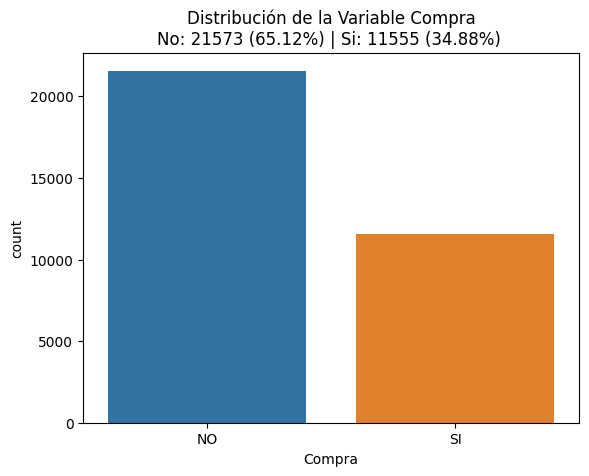

In [18]:
%matplotlib inline

compra_proportion = (df_train['Compra'].value_counts()).to_dict()
ax = sns.countplot(x=df_train["Compra"])
title = ("Distribución de la Variable Compra\n"
    f"No: {compra_proportion['NO']} ({(compra_proportion['NO']/len(df_train)):0.2%}) |"
    f" Si: {compra_proportion['SI']} ({(compra_proportion['SI']/len(df_train)):0.2%}) " )
ax.set_title(title)




In [19]:
df_train.drop(['ID'], axis='columns', inplace=True)
df_train.drop(['Company'], axis='columns', inplace=True)
df_train.drop(['Job'], axis='columns', inplace=True)
df_train.drop(['Comentario'], axis='columns', inplace=True)


In [20]:
df_train = df_train.drop(df_train[df_train['Height']>210].index)
df_train = df_train.drop(df_train[df_train['Height']<120].index)
df_train = df_train.drop(df_train[df_train['Weight']>140].index)
df_train = df_train.drop(df_train[df_train['Weight']<30].index)

feature engineering

In [21]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
32378,TRANSPIEDECUESTA OPERATIVO,EDWIN ERNESTO CAMACHO,Masculino,29/10/1983,13930315,3112162031,edwinfigueredo2910@gmail.com,93,170,109,37.7,Obesidad_2,Grasa parcial severa,5,3/09/2021,37,NO,2021
21863,PACU ADMINISTRATIVO LOS ACACIOS-PAMPLONA,YORLADI VIDARTE CALVACHE,Femenino,22/02/1989,1114880421,3205062003,yovica2202@gmail.com,TORRE 10 APTO 404 VILLA DE SAN DIEGO LOS PATIOS,170,74,25.6,Sobrepeso,Grasa parcial severa,5,4/08/2020,31,NO,2020
26362,TRANSPIEDECUESTA,INGRID JOHANA MENDOZA,Femenino,5/03/1998,1102386356,3126064804,johana0325@gmail.com,CARRERA 19 5E 23 LA COLINA,156,46,18.9,bajo peso,Peso inferior leve,5,27/02/2021,22,NO,2021
12671,INVERPRIMOS MEDELLIN ADM,JOBAN ESTEVEN GOMEZ RESTREPO,Masculino,3/09/1992,1017204965,3146012662,sgomez@iprpartesyrepuestos.com,CLL 14SUR # 51C 05,182,93,28.1,Sobrepeso,Grasa parcial severa,8,15/08/2019,27,NO,2019
37463,HOGAR INFANTIL CN OPERATIVO 20/12/2021,DIANA CAROLINA CALDERON MARTINEZ,Femenino,23/04/1991,1098706715,3106480746,diana231@hotmail.com,97,167,76,27.3,Sobrepeso,Grasa parcial severa,1,30/12/2021,30,SI,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13959,TORO MC COY FAST FOOD BUCARAMANGA OPERATIVOS,JENNYFER LIZETH GOMEZ AMAYA,Femenino,11/11/1994,1090483966,3223082624,jensermay08@gmail.com,CALLE 68B # 10D 84 PABLO SEXTO,156,61,25.1,Sobrepeso,Ligeramente por encima del peso normal,3,15/09/2019,25,NO,2019
8904,varios,MARIA FERNANDO ROMAN REYES,Femenino,12/07/1993,1098740774,3108150496,MARIAFERNANDAROMAN1207@GMAIL.COM,CALL11#24-20 ESPERANZA 2,165,62,22.8,normal,Peso corporal estándar,9,15/06/2019,26,SI,2019
41570,HOSPITAL EMIRO QUINTERO ADM,ANA SOFIA QUINTERO,Femenino,19/07/1960,27851878,3133726820,NaN,NaN,155,58,24.1,normal,Ligeramente por encima del peso normal,7,13/07/2022,61,NO,2022
40282,OMIMED SAS ADMINISTRATIVO 20 05 2022,SANDRA PATRICIA ROA CHAVEZ,Femenino,21/10/1979,28019945,3223527910,osmaanme@hotmail.com,NaN,161,72,27.8,Sobrepeso,Grasa parcial severa,1,25/05/2022,42,SI,2022


# One-Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder
estado_encoder = OneHotEncoder()

estado_encoder.fit(df_train[['Estado']])

OneHotEncoder()

In [23]:
encoded_estado = estado_encoder.transform(df_train[['Estado']])
encoded_estado.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [24]:
encoded_estado = pd.DataFrame(encoded_estado.toarray(), columns=estado_encoder.categories_)
encoded_estado['original_value'] = df_train['Estado']
encoded_estado

,Obesidad Morbida,Obesidad_1,Obesidad_2,Sobrepeso,bajo peso,normal,original_value
0,0.0,0.0,1.0,0.0,0.0,0.0,bajo peso
1,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,1.0,0.0,Sobrepeso
3,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,normal
...,...,...,...,...,...,...,...
32978,0.0,0.0,0.0,1.0,0.0,0.0,normal
32979,0.0,0.0,0.0,0.0,0.0,1.0,NaN
32980,0.0,0.0,0.0,0.0,0.0,1.0,normal
32981,0.0,0.0,0.0,1.0,0.0,0.0,NaN


# Binning

In [25]:
from custom_transformers import CutTransformer

In [26]:
edad_bin = CutTransformer(bins = [0, 20, 30, 40, 50, 60, 1000], as_str=True)

In [27]:
edad_frame = df_train[['Edad']].copy()
edad_bin.fit(edad_frame[['Edad']])

edad_encoded = edad_bin.fit_transform(edad_frame[['Edad']])
edad_frame['edad_encoded'] = edad_encoded

In [28]:
edad_frame

,Edad,edad_encoded
32378,37,"(30, 40]"
21863,31,"(30, 40]"
26362,22,"(20, 30]"
12671,27,"(20, 30]"
37463,30,"(20, 30]"
...,...,...
13959,25,"(20, 30]"
8904,26,"(20, 30]"
41570,61,"(60, 1000]"
40282,42,"(40, 50]"


In [29]:
edad_one_hot_encoder = OneHotEncoder()

In [30]:
edad_one_hot_encoder.fit(edad_frame[['edad_encoded']])

OneHotEncoder()

In [31]:
edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [32]:
oh_age = edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

In [33]:
one_hot_encoded_edades = pd.DataFrame(
    oh_age,
    columns=edad_one_hot_encoder.categories_
)

In [34]:
pd.merge(edad_frame, one_hot_encoded_edades, left_index=True, right_index=True)

,Edad,edad_encoded,"((0, 20],)","((20, 30],)","((30, 40],)","((40, 50],)","((50, 60],)","((60, 1000],)"
32378,37,"(30, 40]",0.0,1.0,0.0,0.0,0.0,0.0
21863,31,"(30, 40]",0.0,0.0,0.0,0.0,1.0,0.0
26362,22,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0
12671,27,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
15592,51,"(50, 60]",0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19487,32,"(30, 40]",0.0,1.0,0.0,0.0,0.0,0.0
16071,25,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
13959,25,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
8904,26,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
weight_scaler = StandardScaler()

In [37]:
weight_scaled = df_train[['Weight']].copy()

In [38]:
weight_scaled['weight_scaled'] = weight_scaler.fit_transform(weight_scaled[['Weight']])

In [39]:
weight_scaled

,Weight,weight_scaled
32378,109,2.482818
21863,74,0.087580
26362,46,-1.828610
12671,93,1.387852
37463,76,0.224451
...,...,...
13959,61,-0.802080
8904,62,-0.733644
41570,58,-1.007386
40282,72,-0.049291


## Convierte *"Masculino"* y *"Femenino"* a enteros

In [40]:
from custom_transformers import MasFemTransformer

mas_fem_transformer = MasFemTransformer()

In [41]:
sexo_frame = df_train[['Sexo']].copy()

In [42]:
sexo_frame[['sexo_mapeado']] = mas_fem_transformer.fit_transform(sexo_frame)

In [43]:
sexo_frame

,Sexo,sexo_mapeado
32378,Masculino,1
21863,Femenino,0
26362,Femenino,0
12671,Masculino,1
37463,Femenino,0
...,...,...
13959,Femenino,0
8904,Femenino,0
41570,Femenino,0
40282,Femenino,0


In [44]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
32378,TRANSPIEDECUESTA OPERATIVO,EDWIN ERNESTO CAMACHO,Masculino,29/10/1983,13930315,3112162031,edwinfigueredo2910@gmail.com,93,170,109,37.7,Obesidad_2,Grasa parcial severa,5,3/09/2021,37,NO,2021
21863,PACU ADMINISTRATIVO LOS ACACIOS-PAMPLONA,YORLADI VIDARTE CALVACHE,Femenino,22/02/1989,1114880421,3205062003,yovica2202@gmail.com,TORRE 10 APTO 404 VILLA DE SAN DIEGO LOS PATIOS,170,74,25.6,Sobrepeso,Grasa parcial severa,5,4/08/2020,31,NO,2020
26362,TRANSPIEDECUESTA,INGRID JOHANA MENDOZA,Femenino,5/03/1998,1102386356,3126064804,johana0325@gmail.com,CARRERA 19 5E 23 LA COLINA,156,46,18.9,bajo peso,Peso inferior leve,5,27/02/2021,22,NO,2021
12671,INVERPRIMOS MEDELLIN ADM,JOBAN ESTEVEN GOMEZ RESTREPO,Masculino,3/09/1992,1017204965,3146012662,sgomez@iprpartesyrepuestos.com,CLL 14SUR # 51C 05,182,93,28.1,Sobrepeso,Grasa parcial severa,8,15/08/2019,27,NO,2019
37463,HOGAR INFANTIL CN OPERATIVO 20/12/2021,DIANA CAROLINA CALDERON MARTINEZ,Femenino,23/04/1991,1098706715,3106480746,diana231@hotmail.com,97,167,76,27.3,Sobrepeso,Grasa parcial severa,1,30/12/2021,30,SI,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13959,TORO MC COY FAST FOOD BUCARAMANGA OPERATIVOS,JENNYFER LIZETH GOMEZ AMAYA,Femenino,11/11/1994,1090483966,3223082624,jensermay08@gmail.com,CALLE 68B # 10D 84 PABLO SEXTO,156,61,25.1,Sobrepeso,Ligeramente por encima del peso normal,3,15/09/2019,25,NO,2019
8904,varios,MARIA FERNANDO ROMAN REYES,Femenino,12/07/1993,1098740774,3108150496,MARIAFERNANDAROMAN1207@GMAIL.COM,CALL11#24-20 ESPERANZA 2,165,62,22.8,normal,Peso corporal estándar,9,15/06/2019,26,SI,2019
41570,HOSPITAL EMIRO QUINTERO ADM,ANA SOFIA QUINTERO,Femenino,19/07/1960,27851878,3133726820,NaN,NaN,155,58,24.1,normal,Ligeramente por encima del peso normal,7,13/07/2022,61,NO,2022
40282,OMIMED SAS ADMINISTRATIVO 20 05 2022,SANDRA PATRICIA ROA CHAVEZ,Femenino,21/10/1979,28019945,3223527910,osmaanme@hotmail.com,NaN,161,72,27.8,Sobrepeso,Grasa parcial severa,1,25/05/2022,42,SI,2022


# pipline

In [45]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn import set_config

In [46]:
# One-Hot encode estado status
one_hot_encode_categoricals = ColumnTransformer([
    (
        'one_hot_encode', # Nombre de la transformación
        OneHotEncoder(), # Transformación a aplicar
        ["Estado", 'Result', 'Consultor', 'Año'] # Columnas involucradas
    )
])

In [47]:
# Bin and encode edad
bin_and_encode_edad_pipeline = Pipeline([
    ('bin_edad', CutTransformer(bins =  [0, 20, 30, 40, 50, 60, 1000], as_str=True)),
    ('encode_edad', OneHotEncoder()),
])

bin_and_encode_edad = ColumnTransformer([
    ('bin_and_encode_edad',
    bin_and_encode_edad_pipeline,
    ["Edad"])
])

In [48]:
# Scale weight
weight_scaled = ColumnTransformer([
    (
        'scale_weight', # Nombre de la transformación
        StandardScaler(), # Transformación a aplicar
        ["Weight"] # Columnas involucradas
    )
])

In [49]:
# Map sexo
map_sexo = ColumnTransformer([
    (
        'map_sexo', # Nombre de la transformación
        MasFemTransformer(), # Transformación a aplicar
        ["Sexo"] # Columnas involucradas
    )
])

In [50]:
passthrough = ColumnTransformer([
    (
        'passthrough',
        'passthrough',
        ['Height', "IMC", "Consultor"]
    )
])

In [51]:
# Ensambla todo el pipeline
feature_pipeline = Pipeline([
    (
        'features',
        FeatureUnion([
            ('one_hot_encode_categoricals', one_hot_encode_categoricals),
            ('bin_and_encode_edad', bin_and_encode_edad),
            ('scale_weight', weight_scaled),
            ('passthrough', passthrough),
            ('map_sexo', map_sexo),
        ])
    )
])

In [52]:
from sklearn import set_config

set_config(display="diagram")
feature_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [53]:
feature_pipeline.fit(df_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [54]:
feature_pipeline.transform(df_train)

<32983x43 sparse matrix of type '<class 'numpy.float64'>'
	with 313991 stored elements in Compressed Sparse Row format>

In [55]:
feature_pipeline.transform(df_train).toarray().shape

(32983, 43)

In [56]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
32378,TRANSPIEDECUESTA OPERATIVO,EDWIN ERNESTO CAMACHO,Masculino,29/10/1983,13930315,3112162031,edwinfigueredo2910@gmail.com,93,170,109,37.7,Obesidad_2,Grasa parcial severa,5,3/09/2021,37,NO,2021
21863,PACU ADMINISTRATIVO LOS ACACIOS-PAMPLONA,YORLADI VIDARTE CALVACHE,Femenino,22/02/1989,1114880421,3205062003,yovica2202@gmail.com,TORRE 10 APTO 404 VILLA DE SAN DIEGO LOS PATIOS,170,74,25.6,Sobrepeso,Grasa parcial severa,5,4/08/2020,31,NO,2020
26362,TRANSPIEDECUESTA,INGRID JOHANA MENDOZA,Femenino,5/03/1998,1102386356,3126064804,johana0325@gmail.com,CARRERA 19 5E 23 LA COLINA,156,46,18.9,bajo peso,Peso inferior leve,5,27/02/2021,22,NO,2021
12671,INVERPRIMOS MEDELLIN ADM,JOBAN ESTEVEN GOMEZ RESTREPO,Masculino,3/09/1992,1017204965,3146012662,sgomez@iprpartesyrepuestos.com,CLL 14SUR # 51C 05,182,93,28.1,Sobrepeso,Grasa parcial severa,8,15/08/2019,27,NO,2019
37463,HOGAR INFANTIL CN OPERATIVO 20/12/2021,DIANA CAROLINA CALDERON MARTINEZ,Femenino,23/04/1991,1098706715,3106480746,diana231@hotmail.com,97,167,76,27.3,Sobrepeso,Grasa parcial severa,1,30/12/2021,30,SI,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13959,TORO MC COY FAST FOOD BUCARAMANGA OPERATIVOS,JENNYFER LIZETH GOMEZ AMAYA,Femenino,11/11/1994,1090483966,3223082624,jensermay08@gmail.com,CALLE 68B # 10D 84 PABLO SEXTO,156,61,25.1,Sobrepeso,Ligeramente por encima del peso normal,3,15/09/2019,25,NO,2019
8904,varios,MARIA FERNANDO ROMAN REYES,Femenino,12/07/1993,1098740774,3108150496,MARIAFERNANDAROMAN1207@GMAIL.COM,CALL11#24-20 ESPERANZA 2,165,62,22.8,normal,Peso corporal estándar,9,15/06/2019,26,SI,2019
41570,HOSPITAL EMIRO QUINTERO ADM,ANA SOFIA QUINTERO,Femenino,19/07/1960,27851878,3133726820,NaN,NaN,155,58,24.1,normal,Ligeramente por encima del peso normal,7,13/07/2022,61,NO,2022
40282,OMIMED SAS ADMINISTRATIVO 20 05 2022,SANDRA PATRICIA ROA CHAVEZ,Femenino,21/10/1979,28019945,3223527910,osmaanme@hotmail.com,NaN,161,72,27.8,Sobrepeso,Grasa parcial severa,1,25/05/2022,42,SI,2022


In [57]:

temp_train = pd.DataFrame(feature_pipeline.transform(df_train).toarray())
temp_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.482818,170.0,37.7,5.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.087580,170.0,25.6,5.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-1.828610,156.0,18.9,5.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.387852,182.0,28.1,8.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.224451,167.0,27.3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32978,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.802080,156.0,25.1,3.0,0.0
32979,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.733644,165.0,22.8,9.0,0.0
32980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.007386,155.0,24.1,7.0,0.0
32981,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.049291,161.0,27.8,1.0,0.0


# Convertimos la variable objetivo compra a 0 y 1

In [58]:
compra_frame = df_train[['Compra']].copy()
compra_frame['encoded'] = np.where(compra_frame['Compra'] == 'SI', 1, 0)

compra_frame.head(10)

,Compra,encoded
32378,NO,0
21863,NO,0
26362,NO,0
12671,NO,0
37463,SI,1
15592,NO,0
25257,SI,1
16870,NO,0
19628,SI,1
4748,NO,0


In [59]:
training_target_encoded = np.where(compra_frame['Compra'] == 'SI', 1, 0)

In [60]:
training_target_encoded

array([0, 0, 0, ..., 0, 1, 1])

## Machine Learning - Entrenamiento del modelo

In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
search_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier())
])

In [63]:
param_grid = {
    "model__n_estimators": [50,100,150,200,300,500],
    'model__max_depth': [None, 3, 5, 7, 9],
    # 'model__subsample': [1, 0.3, 0.5],
    # 'model__scale_pos_weight': [1, 7.5],
    'model__eta': [0.5, 1, 2, 3]
}
search = GridSearchCV(search_pipeline, param_grid, n_jobs=-1, scoring='precision')
_ = search.fit(df_train, training_target_encoded)

In [64]:
# ?XGBClassifier

In [65]:
best_params = {key[7:]:value for key, value in search.best_params_.items()}
print("Best parameters:", best_params)
print(f"Best score: {search.best_score_:0.3%}")

Best parameters: {'eta': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.5}
Best score: 65.813%


In [66]:
search.best_params_


{'model__eta': 0.01,
 'model__max_depth': 3,
 'model__n_estimators': 100,
 'model__scale_pos_weight': 1,
 'model__subsample': 0.5}

## Reentrena el mejor modelo con los mejores parámetros

In [67]:
inference_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier(**best_params))
])
_ = inference_pipeline.fit(df_train, training_target_encoded)

In [68]:
predicciones = inference_pipeline.predict(df_train)

In [69]:
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

In [71]:


def evaluate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(confusion_matrix(y_true, y_pred))

    print(f"R: {recall:0.2%} A: {accuracy:0.2%} P: {precision:0.2%}")

In [72]:
evaluate(training_target_encoded, predicciones)

[[21446    23]
 [11452    62]]
R: 0.54% A: 65.21% P: 72.94%


## Evaluando con los datos de prueba

In [73]:
predicciones_test = inference_pipeline.predict(df_test)
predicciones_test

evaluate(np.where(df_test['Compra'] == 'SI', 1, 0), predicciones_test)

[[9233   14]
 [4930   22]]
R: 0.44% A: 65.18% P: 61.11%


In [74]:
df_test['Compra'].value_counts()

NO    9247
SI    4952
Name: Compra, dtype: int64

## Guardando todo el pipeline

In [75]:
import pickle

with open("lead_scoring.pickle", "wb") as wb:
    pickle.dump(inference_pipeline, wb)

## ¿Y el lead scoring?

In [76]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

 > ℹ️ `predict_proba` regresa un arreglo de tamaño *(n_samples, n_classes)*, en donde las clases están dadas en el orden dictado por `lead_scoring.classes_`

In [77]:
probabilidades = lead_scoring.predict_proba(df_test)
valores =pd.DataFrame(probabilidades)
valores['pred'] = predicciones_test
valores

,0,1,pred
0,0.564788,0.435212,0
1,0.586601,0.413399,0
2,0.641074,0.358926,0
3,0.567421,0.432579,0
4,0.597971,0.402029,0
...,...,...,...
14194,0.570702,0.429298,0
14195,0.598736,0.401264,0
14196,0.641074,0.358926,0
14197,0.590712,0.409288,0


In [78]:
lead_scoring.classes_

array([0, 1])

In [79]:
df_test['score'] = probabilidades[:, 1]

In [80]:
df_test[["ID", "score"]].sort_values('score', ascending=False)

,ID,score
19752,19753,0.528898
20979,20980,0.519090
20201,20202,0.517901
25056,25057,0.514843
25330,25331,0.513925
...,...,...
46766,46767,0.319500
46391,46392,0.319267
45759,45760,0.319267
45765,45766,0.318992


In [81]:
df_test['score'] = probabilidades[:, 1]

In [82]:
dbcompra = df_test.sort_values('score', ascending=False)

In [83]:
dbcompra

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año,score
19752,19753,DOMICILIARIA,ROSARIO LEON OSORIO,Femenino,18/05/1950,26209354,3178485884,BMNAGA,DOMICILIARIA,rogata333@hotmail.com,...,63,30.0,Obesidad_1,Grasa parcial severa,8,30/01/2020,69,SI,2020,0.528898
20979,20980,ESE BARRANCABERMEJA ADMINISTRATIVOS,GLADYS ELENA BELLO HERNANDEZ,Femenino,15/09/1957,37923901,3202690049,SANTANDER,OFICIOS GENERALES,juyis.11@hotmail.com.com,...,83,33.2,Obesidad_1,Grasa parcial severa,10,3/03/2020,62,SI,2020,0.519090
20201,20202,varios,MARIA CELINA QUIJO PEÑARANDA,Femenino,17/01/1954,37311938,3177726174,SANTANDER,AMA DE CASA,NaN,...,92,38.3,Obesidad_2,Grasa parcial severa,13,11/02/2020,66,NO,2020,0.517901
25056,25057,ASSEAR BARRANCA OPERATIVO,MILADY ADRIANA CONTRERAS,Femenino,17/11/1978,63472760,3142689844,SERVICIOS GENERALES,36,mila_lagrima@hotmail.com,...,82,36.4,Obesidad_2,Grasa parcial severa,6,8/12/2020,42,SI,2020,0.514843
25330,25331,ASA CONSTRUCCIONES ADMINISTRATIVO BARRANCA,FREDYS ANTONIO RUA OROZCO,Masculino,2/04/1957,13884489,3118408105,OFICIAL,365,ruafredy@gmail.com,...,88,32.3,Obesidad_1,Grasa parcial severa,8,15/12/2020,63,SI,2020,0.513925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46766,46767,GASEOSAS LUX 17-11-22,GABRIELA MANOSALVA RONDON,Femenino,7/07/1999,1102390361,3184160204,TA 114/60MMHG FC72,APRENDIZ GESTION HUMANA,NaN,...,66,22.3,normal,Peso corporal estándar,2,29/11/2022,23,NO,2022,0.319500
46391,46392,FRIMAC 26/10/22,JOSE MIGUEL DIAZ GALVIS,Masculino,28/07/1986,1094240872,3235753340,TA 134/77 MMHG FC69,PROFESIONAL TIC,michael2027@gmail.com,...,86,24.6,normal,Ligeramente por encima del peso normal,2,16/11/2022,36,SI,2022,0.319267
45759,45760,JJM TELECOMUNICACIONES 21-10-22,JIMMY JESUS BAYONA TORRADO,Masculino,28/01/1963,88136844,3154445144,TA 143/92MMHG FC72,DIRECTOR COMERCIAL,NaN,...,81,24.7,normal,Ligeramente por encima del peso normal,2,24/10/2022,59,NO,2022,0.319267
45765,45766,LAVANDERIA VICTORIA 22-10-22,ZULEIDY ROMERO JAIMES,Femenino,30/11/1992,1127349725,3013299589,TA 118/76MMHG FC66,MAQUILLAJE JEAN,romerozuleidy1@gmail.com,...,73,25.3,Sobrepeso,Grasa parcial severa,2,24/10/2022,29,SI,2022,0.318992


In [84]:
dbcompra.to_csv('compra.csv')